# MODELING; WHAT DRIVES DRIVES REVENUE?

With the Apprentice Chef data set we are tasked to run a variety of models in order to establish which factors influence revenue and why. 

All the way down in this script is a reflection and a conclusion to be read about this project. 

The below code imports the vast majority of the Python packages necessary to develop this analysis. However, throughout the script a few other packages will be imported such as seaborn. 

The code block below also sets the sizes of how we want to display the panda dataframes, and of which excel file to import. 

In [1]:
#############################################################################
# importing packages
########################################
import matplotlib.pyplot as plt                        # data visualization
import pandas as pd                                    # data science essentials
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.tree import plot_tree                     #  tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
import sklearn.linear_model                            # linear modeling in scikit-learn
import statsmodels.formula.api as smf                  # predictive modeling with nice outputs
from sklearn.ensemble import RandomForestRegressor





########################################
# loading data and setting display options
########################################

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
meal = pd.read_excel(io = file)

# outputting the first ten rows of the dataset
meal.head(n=5)



,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [2]:
# importing sns package for visualizations
import seaborn as sns                 # enhanced graphical output

As the dataset has been printed above, the code cell below starts to explore the dataset a bit more in detail. The response variable is the revenue, and all the rest are the x-variables (or the the reason that explain the revenue). 

The columns with string data types, have been removed from further analysis. The analysis continuous with all numeric data types and below is representation of the various features seen in scatterplots.

The scatterplots clearly show which features are of continuous nature, and which are of categorical/interval nature. This benefits for later in the analysis. 

Text(0, 0.5, 'REVENUE')

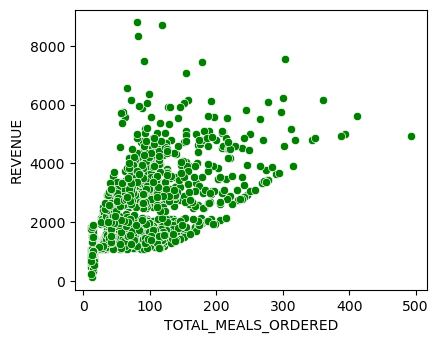

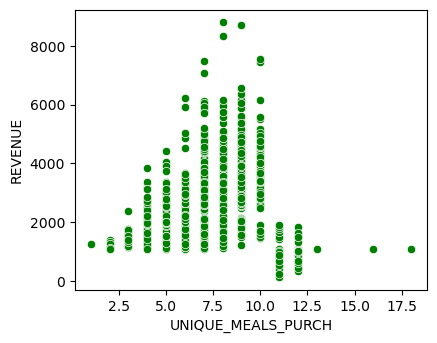

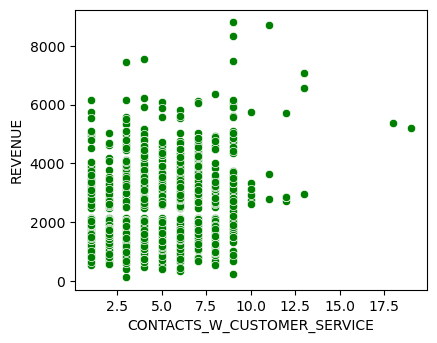

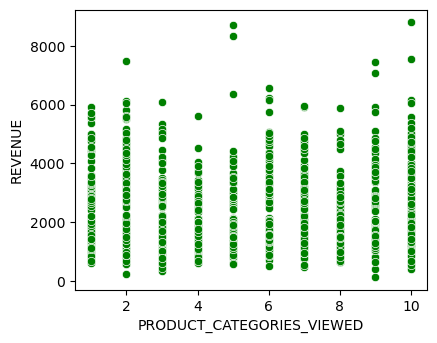

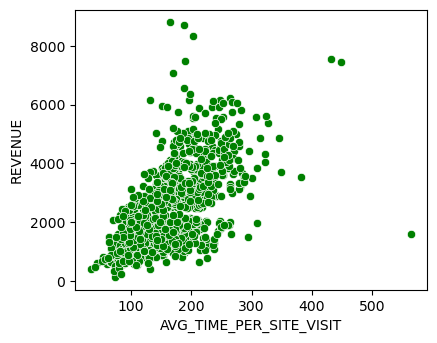

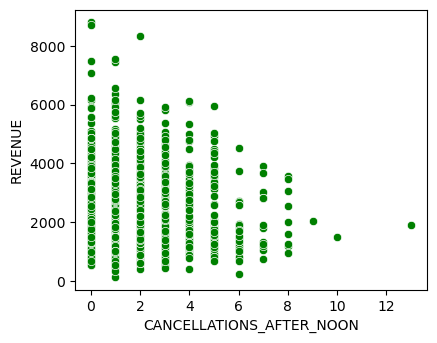

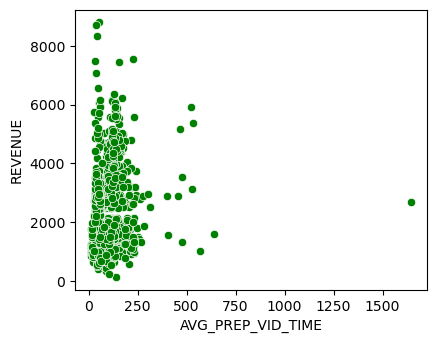

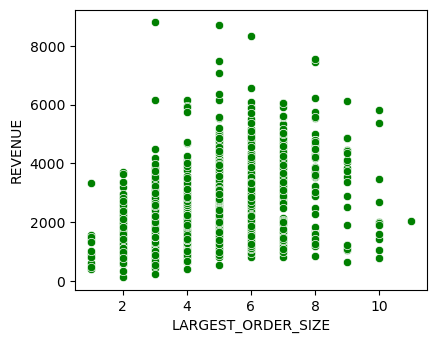

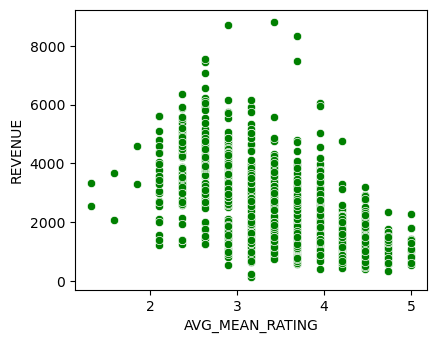

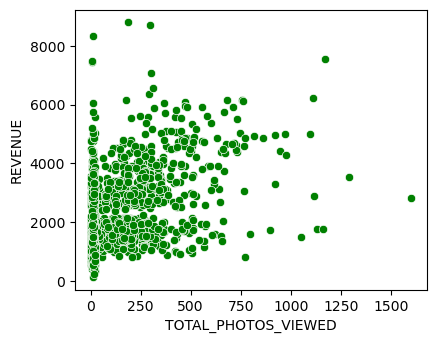

In [3]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['TOTAL_MEALS_ORDERED'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['UNIQUE_MEALS_PURCH'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['CONTACTS_W_CUSTOMER_SERVICE'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['PRODUCT_CATEGORIES_VIEWED'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['AVG_TIME_PER_SITE_VISIT'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['CANCELLATIONS_AFTER_NOON'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['AVG_PREP_VID_TIME'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['LARGEST_ORDER_SIZE'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['AVG_MEAN_RATING'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = meal['TOTAL_PHOTOS_VIEWED'],
                y = meal['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

#############################################################################



The cell block below functions as adding new features, derived from the columns that are already in the dataset. The cell block includes just one feature being added; as the analyst was short of time on reviewing various other features. 

In [4]:
############################################################################
#                         ADDING NEW FEATURES HERE
############################################################################

meal['NUM_MEALS_PER_PURCH'] = (meal['TOTAL_MEALS_ORDERED'] / meal['UNIQUE_MEALS_PURCH']).round(decimals=2)

The cell block below does an analysis on the skewness of very feature, including, the new feature that has been created and saved to the dataset. To know the skewness is important because it allows for a better visualization of the linear correlations between the variables and the y-variable. 

If features are highly skewed, meaning above 1, it means that there are more outliers to the right that are perhaps making the interpretation of statistical models more difficult; as well as the visualizations. 

In [5]:
############################################################################
#                CHECKING EVERY VARIABLE FOR SKEWNESS HERE
############################################################################

print(f"Skew REVENUE: {round(meal['REVENUE'].skew(), ndigits = 2)}")

print(f"Skew TOTAL_MEALS_ORDERED: {round(meal['TOTAL_MEALS_ORDERED'].skew(), ndigits = 2)}")
print(f"Skew UNIQUE_MEALS_PURCH: {round(meal['UNIQUE_MEALS_PURCH'].skew(), ndigits = 2)}")
print(f"Skew CONTACTS_W_CUSTOMER_SERVICE: {round(meal['CONTACTS_W_CUSTOMER_SERVICE'].skew(), ndigits = 2)}")
print(f"Skew PRODUCT_CATEGORIES_VIEWED: {round(meal['PRODUCT_CATEGORIES_VIEWED'].skew(), ndigits = 2)}")
print(f"Skew AVG_TIME_PER_SITE_VISIT: {round(meal['AVG_TIME_PER_SITE_VISIT'].skew(), ndigits = 2)}")
print(f"Skew CANCELLATIONS_AFTER_NOON: {round(meal['CANCELLATIONS_AFTER_NOON'].skew(), ndigits = 2)}")
print(f"Skew PC_LOGINS: {round(meal['PC_LOGINS'].skew(), ndigits = 2)}")
print(f"Skew MOBILE_LOGINS: {round(meal['MOBILE_LOGINS'].skew(), ndigits = 2)}")
print(f"Skew WEEKLY_PLAN: {round(meal['WEEKLY_PLAN'].skew(), ndigits = 2)}")
print(f"Skew LATE_DELIVERIES: {round(meal['LATE_DELIVERIES'].skew(), ndigits = 2)}")
print(f"Skew AVG_PREP_VID_TIME: {round(meal['AVG_PREP_VID_TIME'].skew(), ndigits = 2)}")
print(f"Skew LARGEST_ORDER_SIZE: {round(meal['LARGEST_ORDER_SIZE'].skew(), ndigits = 2)}")
print(f"Skew AVG_MEAN_RATING: {round(meal['AVG_MEAN_RATING'].skew(), ndigits = 2)}")
print(f"Skew TOTAL_PHOTOS_VIEWED: {round(meal['TOTAL_PHOTOS_VIEWED'].skew(), ndigits = 2)}")
print(f"Skew NUM_MEALS_PER_PURCH: {round(meal['NUM_MEALS_PER_PURCH'].skew(), ndigits = 2)}")




Skew REVENUE: 1.63
Skew TOTAL_MEALS_ORDERED: 2.01
Skew UNIQUE_MEALS_PURCH: 0.57
Skew CONTACTS_W_CUSTOMER_SERVICE: 0.37
Skew PRODUCT_CATEGORIES_VIEWED: 0.16
Skew AVG_TIME_PER_SITE_VISIT: 1.2
Skew CANCELLATIONS_AFTER_NOON: 1.44
Skew PC_LOGINS: -0.04
Skew MOBILE_LOGINS: 0.05
Skew WEEKLY_PLAN: 1.54
Skew LATE_DELIVERIES: 1.71
Skew AVG_PREP_VID_TIME: 9.64
Skew LARGEST_ORDER_SIZE: 0.7
Skew AVG_MEAN_RATING: -0.11
Skew TOTAL_PHOTOS_VIEWED: 2.6
Skew NUM_MEALS_PER_PURCH: 1.47


In the cell below below, we transform the highly skewed (positively) into logarithmic variables. 

Logarithmic transformations can help to improve the performance of statistical models by normalizing the distribution of data, handling outliers, and better modeling non-linear relationships. That's the reason into changing these; so that in later analyses these can have a better prediction on the various sets of data. 

In [6]:
import numpy as np

In [7]:
############################################################################
#             TRANSFORMING TO LOG VARIABLES HERE (everything above 1.0)
############################################################################

meal['log_REVENUE']                   = np.log(meal['REVENUE'] + 0.0001)
meal['log_TOTAL_MEALS_ORDERED']       = np.log(meal['TOTAL_MEALS_ORDERED']+ 0.0001)
meal['log_AVG_TIME_PER_SITE_VISIT']   = np.log(meal['AVG_TIME_PER_SITE_VISIT']+ 0.0001)
meal['log_CANCELLATIONS_AFTER_NOON']  = np.log(meal['CANCELLATIONS_AFTER_NOON']+ 0.0001)
meal['log_WEEKLY_PLAN']               = np.log(meal['WEEKLY_PLAN']+ 0.0001)
meal['log_LATE_DELIVERIES']           = np.log(meal['LATE_DELIVERIES']+ 0.0001)
meal['log_AVG_PREP_VID_TIME']         = np.log(meal['AVG_PREP_VID_TIME']+ 0.0001)
meal['log_TOTAL_PHOTOS_VIEWED']       = np.log(meal['TOTAL_PHOTOS_VIEWED']+ 0.0001)
meal['log_NUM_MEALS_PER_PURCH']       = np.log(meal['NUM_MEALS_PER_PURCH']+ 0.0001)

In the cell block below the various x-variables have been subset into different lists. These lists are made on the basis of various tries in order to get the best output with the variety of models that are being displayed further down in this script. 

full_x represents almost all variables that could have an impact on Y (minus the string variables)

log_x represents all the variables that were previously highly skewed, and have been transformed to logarithmic values

low_p represents all the variables that had a really low p-value, and therefore a good x-variable to use in the modeling phase. These variables were also selected on the basis of them being continuous, as opposed to categorical or any other type. 

reduced_x proved itself to be the best set, with a variety of log variables and continuous variables. It is basically a hybrid form that yields the highest scores. 

In [8]:
############################################################################
#             PREPARING THE X-VARIABLES, SUBSET IN DIFFERENT LISTS
############################################################################

# all the x-variables
full_x = ['log_TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED'
         ,'log_AVG_TIME_PER_SITE_VISIT','log_CANCELLATIONS_AFTER_NOON','PC_LOGINS','MOBILE_LOGINS','log_WEEKLY_PLAN','log_LATE_DELIVERIES',
         'log_AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','AVG_MEAN_RATING','log_TOTAL_PHOTOS_VIEWED','log_NUM_MEALS_PER_PURCH']

# all the log x-variables
log_x = ['log_TOTAL_MEALS_ORDERED','log_AVG_TIME_PER_SITE_VISIT','log_CANCELLATIONS_AFTER_NOON',
         'log_WEEKLY_PLAN','log_LATE_DELIVERIES','log_AVG_PREP_VID_TIME','log_TOTAL_PHOTOS_VIEWED',
         'log_NUM_MEALS_PER_PURCH']

# all the continuous x-variables with a p-value lower than 0.05
low_p = ['TOTAL_MEALS_ORDERED','AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_PHOTOS_VIEWED','log_AVG_PREP_VID_TIME']

reduced_x = ['log_TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','log_AVG_TIME_PER_SITE_VISIT',
             'log_AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','AVG_MEAN_RATING','log_TOTAL_PHOTOS_VIEWED',
             'log_NUM_MEALS_PER_PURCH']

# outputting the first five rows of the dataset
meal.head(n=5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,NUM_MEALS_PER_PURCH,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,log_CANCELLATIONS_AFTER_NOON,log_WEEKLY_PLAN,log_LATE_DELIVERIES,log_AVG_PREP_VID_TIME,log_TOTAL_PHOTOS_VIEWED,log_NUM_MEALS_PER_PURCH
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,54.78,8.501064,6.200509,5.581992,1.609458,-9.210340,-9.21034,4.922970,6.122493,4.003327
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,40.11,8.724207,5.888878,5.509389,0.693197,-9.210340,-9.21034,4.789158,6.522093,3.691628
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,46.33,8.141772,5.627621,5.102303,-9.210340,1.609458,-9.21034,4.844188,4.976734,3.835792
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,33.62,8.110728,5.594712,5.170485,1.609458,-9.210340,-9.21034,4.865841,6.035482,3.515124
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,39.43,8.139586,5.620401,5.103519,-9.210340,2.639064,-9.21034,3.538641,5.159056,3.674529


The cell block below prepares the dataset for all the scikit models that will follow further down this script. Due to the process being long about finding a 'almost perfect'  fit, this cell seems a bit unorganized. However, to show the process the lines that are now commented out still remain visible. 

Below that, the code is being split into training and testing sets so that it can predict on unknown future values. 

In [9]:
# preparing x-variables from the OLS model
# x_data     = meal.drop(['REVENUE', 'log_REVENUE', 'NAME','EMAIL',  # dropping all string type features
                        # 'FIRST_NAME','FAMILY_NAME'], axis = 1)     # x-variable 

# log_x_data = meal[x_var_log_y]

x_data     = meal[full_x]
#x_data       = meal[low_p]


# preparing response variable
y_data      = meal.loc[ : , 'log_REVENUE']                             # y-variable
# log_y_data  = meal['log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [10]:
# importing RidgeCV for another type of model

from sklearn.linear_model import RidgeCV

The RidgeCV model did not seem to yield the best performance, so it was relatively early ignored. The results did not seem to go higher than .68, so, no further analysis or tuning was done on this model. 

In [11]:
#############################################################################
#                             RIDGECV
#############################################################################

# Setting a model name
model_name = "Ridge CV"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.RidgeCV()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6933
Testing Score  : 0.6981
Train-Test Gap : 0.0048


The Lasso model acted very differently on various lists of subsets of the dataset, with the full_x subset, the scores are very low. However, when the Lasso model was run with the reduced_x subset of the dataset, the Lasso was actually the most promising model in terms of scores. It is not yet clear as to why this happened, but potentially because Lasso kicks out 'bad x-variables' behind the scenes. 

In [12]:
#############################################################################
#                              LASSO MODEL
#############################################################################


# Setting a model name
model_name = "Lasso Model"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
reg = sklearn.linear_model.Lasso(alpha=0.1)


# FITTING to the training data
reg.fit = reg.fit(x_train, y_train)


# PREDICTING on new data
model_pred = reg.predict(x_test)


# SCORING the results
model_train_score = reg.score(x_train, y_train).round(4) # using R-square
model_test_score  = reg.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5022
Testing Score  : 0.4883
Train-Test Gap : 0.0139


The ARD model performed good in most cases; there was just not enough time to discover the potential of this model.

In [13]:
#############################################################################
#                                ARD MODEL
#############################################################################


# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6911
Testing Score  : 0.6984
Train-Test Gap : 0.0073


The Linear Regression Model is the same story as the ARD model, it seemed to perform fine on the various subsets and lists of the dataset, but there was not sufficient time to dive deep in its potential. 

In [14]:
#############################################################################
#                         LINEAR REGRESSION MODEL
#############################################################################

# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6933
Testing Score  : 0.6982
Train-Test Gap : 0.0049


Although, the decision tree regressor was put into a 'hyperparameter' wrapper; it seemed to perform quite poorly every time. Every time it was tested around 100 iterations were run with the given ranges of parameters; however, the scores were bad and moreover differed quite a bit from the other models that were being run. 

In [15]:
#############################################################################
#                        DECISION TREE REGRESSOR
#############################################################################

model_name = "DecisionTreeRegressor"

# declaring a hyperparameter space
criterion_range = ["squared_error", "poisson"]
splitter_range  = ["best", "random"]
depth_range     = range(1,11,2)    # range(100, 1005, 50)
leaf_range      = range(1, 202, 50)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training R-Squared:", tuned_tree_cv.best_score_.round(4))

C:\Users\jaspe\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'squared_error'}
Tuned Training R-Squared: 0.6345


The random forest seemed to perform quite well, I was planning on using it as my final model. However, last moment I decided to take a look at the GBR model and that one did perform slightly better. 

In [16]:
#############################################################################
#                        RANDOM FOREST
#############################################################################

model_name = 'Random Forest'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = RandomForestRegressor(criterion='squared_error',
                              min_samples_leaf = 25,
                              max_depth=8,
                              min_samples_split = 100,
                              max_features = 'auto',
                              random_state = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7771
Testing Score  : 0.7674
Train-Test Gap : 0.0097


In [17]:
# importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

The GBR is my final model with its parameters in its current form, I did not hypertune this model, I did try but the iterations took over 1,5 hour to run, so I had to stop it otherwise I would run out of time. So, I proceeded to manually tune the model bit by bit, untill I came to the current paramters. The scores are being displayed below this block. 

In [20]:
# specifying a model name
model_name = "GBR"


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss             = "absolute_error",
                                  learning_rate    = 0.1,
                                  n_estimators     = 1000,
                                  criterion        = "squared_error",
                                  min_samples_leaf = 100,
                                  max_depth        = 4,
                                  alpha            = 0.9,
                                  warm_start       = False,
                                  random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)


Training Score : 0.8643
Testing Score  : 0.8215
Train-Test Gap : 0.0428


In [21]:
# FINAL RESULT

print(f"""

GBR

GradientBoostingRegressor    Train Score     Test Score       Gap
----------------             ---------       ----------       ----------
Scores                       {model_train_score}          {model_test_score}            {model_gap}
                    
""")



GBR

GradientBoostingRegressor    Train Score     Test Score       Gap
----------------             ---------       ----------       ----------
Scores                       0.8643          0.8215            0.0428
                    



# Conclusion

In hindsight, this project was one of many frustration, and especially a lot of trial and error. I had built a completely different script prior to this one, which included much more analysis about the features such as heatmaps, scatterplots, boxplots, data types, understanding the data set, value.counts, missing values, imputating strategies and more. But, because I had lost a clear overview of what I was doing, I decided last moment to restart the project and start a completely new script. 

This was quite a risky move, considering the time, but it worked out well. With 6 hours to go I started to re-evaluate the dataset and worked more pragmatically and structured toward deciding which model would work best for the dataset at hand. 

I started working with the raw dataset and only added one feature; I'd have loved to add more features but there was just not enough time to also focus on that. I then transformed all the highly skewed variables into logarithmic variables. I tried endless variations of subsets of the variables that I had created on the various models in this script; never did I really receive a high score (more than .70). Way too late, I started tuning the models with parameters and luckily I got a model that is at least above .75! 

Many mistakes were made, and it would have been better to thorougly understand the dataset first; as well as create new features, as well to understand what data types work best on what models. Many more learning points. 

The most important feature; given by a cell block that is in my previous script, was AVG_TIME_PER_SITE_VISIT. This seemed to have the highest impact on revenue. So it is important for the business to know, the longer the customer spends on their website, the more likely they will purchase a meal. Not only the likeliness of purchase seems to increase, but also the amount of the purchase seems to increase also; these are valuable insights for a business. 